In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
#Impor de las librerias necesarias

Haga click en "Archivo" > Upload File suba su archivo de Registros de gastos, recuerde que mientras mas registros tenga mejor sera el resultado, minimo 100 registros.  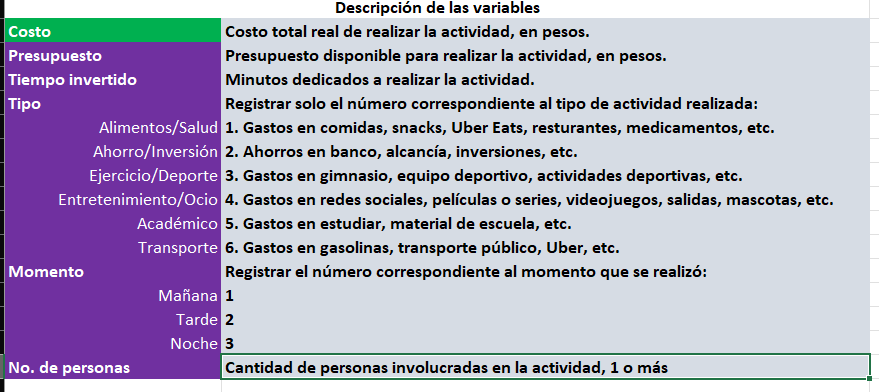

Recuerde que los registros dentro de su archivo .xlsx deben de estar en el siguiente formato:

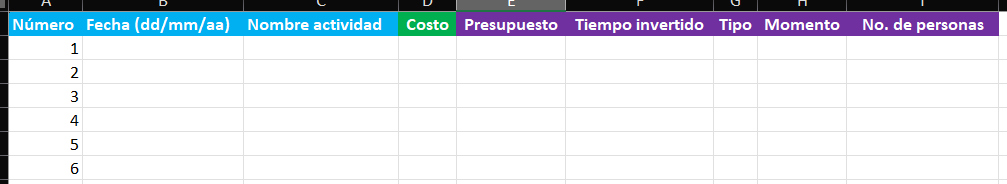

Una vez subido el archivo de Registros puede continuar con el flujo del programa

In [ ]:
df = pd.read_excel('test.xlsx')

In [ ]:
df.head()

,Número,Fecha (dd/mm/aa),Nombre actividad,Costo mxn,Presupuesto,Tiempo invertido min,Tipo,Momento,No. de personas
0,1,2023-08-14,Compra de fruta,70,50,10,1,1,1
1,2,2023-08-14,Renta,4200,4200,1,5,1,1
2,3,2023-08-14,Ahorro mensual,2000,2000,1,2,1,1
3,4,2023-08-14,Compra de Pan bimbo,50,70,10,1,1,1
4,5,2023-08-14,Compra de Platano,47,70,10,1,1,1


In [ ]:
df = df.iloc[:,3:9]

In [ ]:
df.head()

,Costo mxn,Presupuesto,Tiempo invertido min,Tipo,Momento,No. de personas
0,70,50,10,1,1,1
1,4200,4200,1,5,1,1
2,2000,2000,1,2,1,1
3,50,70,10,1,1,1
4,47,70,10,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Costo mxn             300 non-null    int64
 1   Presupuesto           300 non-null    int64
 2   Tiempo invertido min  300 non-null    int64
 3   Tipo                  300 non-null    int64
 4   Momento               300 non-null    int64
 5   No. de personas       300 non-null    int64
dtypes: int64(6)
memory usage: 14.2 KB


In [ ]:
df.isnull().sum()

,0
Costo mxn,0
Presupuesto,0
Tiempo invertido min,0
Tipo,0
Momento,0
No. de personas,0


In [ ]:
df= df.dropna()

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.columns

Index(['Costo mxn', 'Presupuesto', 'Tiempo invertido min', 'Tipo', 'Momento',
       'No. de personas'],
      dtype='object')

In [ ]:
x = df[['Presupuesto', 'Tiempo invertido min', 'Tipo', 'Momento', 'No. de personas']].values # variables independientes
y = df['Costo mxn'].values # variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
y_test

array([   5,   10,   56,   37,   50,  200,   28,   10,  130,   75,   15,
         10,   45,   10,  300, 4200,  100,  100,   18,   28,   10,  100,
         15,   20,   28,   45,   23,   15,  100,   50,   50,   50,   20,
         18,   40,   20,   45,  449,  300,  150,   18,  100,   45,   47,
         37,   18,   30,   45,  100,  200,   10,   13,   30,  300,   18,
         40,   28,  200,   18,   50])

In [ ]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [ ]:
model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_labels = ['Presupuesto', 'Tiempo invertido min', 'Tipo', 'Momento', 'No. de personas']
c_label = ['Coeficientes']

In [ ]:
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.552878
Tiempo invertido min,0.270166
Tipo,13.490918
Momento,-14.098766
No. de personas,24.536887


In [ ]:
y_pred = model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [ ]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 30)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
0,5,78.083972,-73.083972
50,10,169.772684,-159.772684
7,10,170.878440,-160.878440
20,10,3.413730,6.586270
1,10,107.850377,-97.850377
10,15,60.084082,-45.084082
40,18,129.193799,-111.193799
33,18,97.890035,-79.890035
18,18,33.203339,-15.203339
45,18,222.840404,-204.840404


In [ ]:
r2_score(y_test, y_pred) #Mientras mas cerca a 1 mas preciso sera el modelo

0.7802916633526432

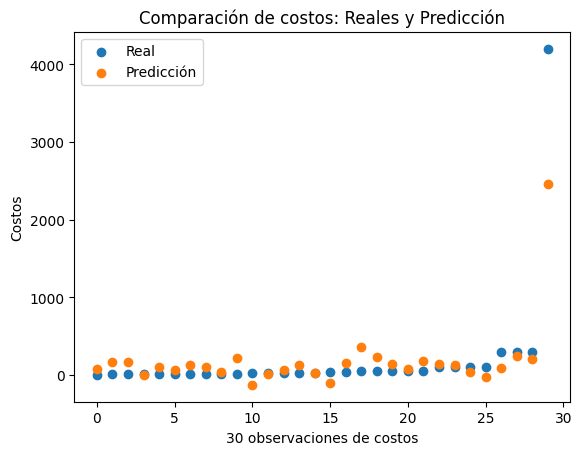

In [ ]:
import matplotlib.pyplot as plt # importamos la librería pyplot que nos permitirá graficar
import numpy as np # importamos la librería numpy que nos permitirá crear un arreglo para la muestra de 30 datos

# función para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(30), residuals['Real'], label = "Real")  # creamos el gráfico con la muestra de datos reales
plt.scatter(np.arange(30), residuals['Predicción'], label = "Predicción")  # creamos el gráfico con la muestra de datos de predicción

plt.title("Comparación de costos: Reales y Predicción") # indicamos el título del gráfico

plt.xlabel("30 observaciones de costos") # indicamos la etiqueta del eje de las x

plt.ylabel("Costos") # indicamos la etiqueta del eje de las y

plt.legend(loc='upper left') # indicamos la posición de la etiqueta de los datos

plt.show() # desplegamos el gráfico

In [ ]:
df.describe()

,Costo mxn,Presupuesto,Tiempo invertido min,Tipo,Momento,No. de personas
count,300.0000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,115.8400,339.280000,34.376667,2.416667,1.796667,1.633333
std,373.7267,450.102643,37.739134,1.999094,0.704967,1.090651
min,5.0000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.0000,149.250000,10.000000,1.000000,1.000000,1.000000
50%,45.0000,244.500000,17.500000,1.000000,2.000000,1.000000
75%,100.0000,413.250000,45.000000,4.000000,2.000000,2.000000
max,4200.0000,4553.000000,240.000000,6.000000,3.000000,8.000000


In [ ]:
df.loc[df.loc[:, "Presupuesto"] == 250]

,Costo mxn,Presupuesto,Tiempo invertido min,Tipo,Momento,No. de personas
26,200,250,30,1,1,1
240,250,250,45,1,2,1
296,37,250,10,1,2,2


In [ ]:
df.loc[df.loc[:, "Presupuesto"] == 20]

,Costo mxn,Presupuesto,Tiempo invertido min,Tipo,Momento,No. de personas
15,10,20,10,1,3,1
36,37,20,5,1,1,1
59,18,20,10,1,1,2
105,12,20,10,1,3,1


In [ ]:
print(df.groupby("Tipo").get_group(1))

     Costo mxn  Presupuesto  Tiempo invertido min  Tipo  Momento  \
0           70           50                    10     1        1   
3           50           70                    10     1        1   
4           47           70                    10     1        1   
5          150          200                    45     1        1   
7          100           80                    30     1        3   
..         ...          ...                   ...   ...      ...   
293         20          218                    10     1        2   
295         50          300                    30     1        1   
296         37          250                    10     1        2   
298        150          173                    45     1        2   
299        300          500                    30     1        1   

     No. de personas  
0                  1  
3                  1  
4                  1  
5                  2  
7                  2  
..               ...  
293                1  

In [ ]:
print(df.groupby("Tipo").get_group(3))

     Costo mxn  Presupuesto  Tiempo invertido min  Tipo  Momento  \
9          150           90                     3     3        2   
21          40           50                    90     3        1   
31        1000         1200                    20     3        1   
37          39           35                    10     3        2   
46          40           50                    90     3        2   
68          40          565                    90     3        1   
84          40          350                    90     3        1   
107         40          200                    90     3        1   
134         40          140                    90     3        1   
153         50          200                    90     3        1   
174         50          170                   120     3        1   
196         50          100                   120     3        1   
217         50          150                    90     3        1   
237         50          100                    9

In [ ]:
print(df.nunique)

<bound method DataFrame.nunique of      Costo mxn  Presupuesto  Tiempo invertido min  Tipo  Momento  \
0           70           50                    10     1        1   
1         4200         4200                     1     5        1   
2         2000         2000                     1     2        1   
3           50           70                    10     1        1   
4           47           70                    10     1        1   
..         ...          ...                   ...   ...      ...   
295         50          300                    30     1        1   
296         37          250                    10     1        2   
297         40          213                    60     3        2   
298        150          173                    45     1        2   
299        300          500                    30     1        1   

     No. de personas  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..        

In [ ]:
print(df["Costo mxn"].sum())

34752


In [ ]:
dfA = (df.groupby("Tipo").get_group(2))

In [ ]:
print(dfA["Costo mxn"].sum())

2085
